<a href="https://colab.research.google.com/github/rozankc/Roza_INFO5731_Fall2024/blob/main/Group3_BKT_Final_Project_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bayesian Knowledge Tracing for Lecture-Quiz Sequences: Modeling Knowledge Progression in MOOCs**

In [ ]:
!pip install pyBKT

In [ ]:
!pip install numpy

In [ ]:
!pip uninstall -y numpy

Found existing installation: numpy 2.2.5
Uninstalling numpy-2.2.5:
  Successfully uninstalled numpy-2.2.5


In [ ]:
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 20.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires 

In [ ]:
!pip uninstall -y pyBKT
!pip install pyBKT

Found existing installation: pyBKT 1.4.1
Uninstalling pyBKT-1.4.1:
  Successfully uninstalled pyBKT-1.4.1
  Using cached pyBKT-1.4.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (24 kB)
Using cached pyBKT-1.4.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.2 MB)


#Step 1: Load the Dataset

In [15]:
#Load the Dataset:
import pandas as pd
data = pd.read_csv('final dataset.csv')

display(data)

,Student ID,Lecture ID,Lecture Completed,Lecture Time,Quiz ID,Quiz Correct (1)/Incorrect (0),Quiz Time,Time Gap(mins)
0,1faefa4bbaf4d8a06bdb17ee811ed10c3802b911,qFz1V,Yes,11/11/2020 15:53,pjoH6,1,11/11/2020 15:57,3.00000
1,e82d5760ed5df80e44827b25636e4a5b8b5dce5d,qFz1V,Yes,11/11/2020 23:55,pjoH6,1,11/11/2020 23:59,3.00000
2,e82d5760ed5df80e44827b25636e4a5b8b5dce5d,5pvI1,Yes,11/12/2020 0:24,CjbTn,1,11/12/2020 0:31,6.00000
3,e82d5760ed5df80e44827b25636e4a5b8b5dce5d,WgQzz,Yes,11/12/2020 1:25,uhKwf,1,11/12/2020 1:53,28.00000
4,1faefa4bbaf4d8a06bdb17ee811ed10c3802b911,5pvI1,Yes,11/12/2020 19:47,CjbTn,1,11/12/2020 21:37,110.00000
...,...,...,...,...,...,...,...,...
6054,fe59afeafcfda6d4e276522f331207020bd624ff,NaN,No,NaN,XCbMm,1,11/2/2022 16:42,NaN
6055,fe59afeafcfda6d4e276522f331207020bd624ff,NaN,No,NaN,U1Uhm,1,11/9/2022 16:53,NaN
6056,fe59afeafcfda6d4e276522f331207020bd624ff,NaN,No,NaN,YOTjX,1,11/15/2022 21:35,NaN
6057,fe59afeafcfda6d4e276522f331207020bd624ff,NaN,No,NaN,sCXTz,1,11/26/2022 0:42,NaN


# Step 2: BKT Modeling with Lecture-Quiz Sequences

Model Training: Use the pyBKT library to train the BKT model with the lecture-quiz sequences.

In [84]:
from pyBKT.models import Model

# Create 'completed_lectures' DataFrame
completed_lectures = data[data['Lecture Completed'] == 'Yes']

# Prepare data for pyBKT
model_data = completed_lectures[['Student ID', 'Quiz ID', 'Quiz Correct (1)/Incorrect (0)', 'Time Gap(mins)']]
model_data.columns = ['student_id', 'skill_name', 'correct', 'time_gap']

# Initialize and fit the BKT model
model = Model(seed=42, num_fits=1)

# Specify the column containing student IDs and skill names using the 'defaults' parameter.
model.fit(data=model_data, defaults={'user_id': 'student_id', 'skill_name': 'skill_name'})


Evaluate the Model: Print the model parameters, including the initial knowledge state, learning rate, guess rate, and slip rate.

In [85]:
from pyBKT.models import Model
from IPython.display import display

# Step 1: Define Quiz IDs and Skill Names
quiz_skill_mapping = {
    'CjbTn': 'The Role of Social Work',
    'Etc8T': 'The Cost of Child Care',
    'pjoH6': 'Key Concept Quiz',
    'qKBkT': 'Identify Examples of Health Disparities',
    'sCXTz': 'Into America: Dirty Air & COVID-19 Vulnerability',
    'U1Uhm': 'Aging Onto The Street',
    'uhKwf': 'Unpacking Intersectionality',
    'XCbMm': 'The Moral Determinants of Health',
    'YOTjX': 'Case Study on Recent Protests Sparked by the Killing of George Floyd'
}

# Step 2: Evaluate the Model
print("Model Parameters:")
params = model.params()  # Get model parameters

# Create a list to store the parameters for each skill
skill_params = []

# Step 3: Access parameters for each skill
for skill in params.index.levels[0]:
    # Get the corresponding Quiz ID from the mapping
    quiz_id = skill  # Skill is the Quiz ID
    skill_name = quiz_skill_mapping.get(quiz_id, "Unknown Skill")

    # Append the parameters to the list
    skill_params.append([
        quiz_id,
        skill_name,
        params.loc[skill].loc['prior'].values[0],
        params.loc[skill].loc['learns'].values[0],
        params.loc[skill].loc['guesses'].values[0],
        params.loc[skill].loc['slips'].values[0],
        params.loc[skill].loc['forgets'].values[0]  # Include forget rate
    ])

# Create a DataFrame from the list of parameters
params_df = pd.DataFrame(skill_params, columns=['Quiz ID', 'Skill Name', 'p(Know_0)', 'p(Learn)', 'p(Guess)', 'p(Slip)', 'p(Forget)'])

# Display the DataFrame using display
display(params_df)

Model Parameters:


,Quiz ID,Skill Name,p(Know_0),p(Learn),p(Guess),p(Slip),p(Forget)
0,CjbTn,The Role of Social Work,[0.2160963829793729],[1.0],[1.0],[0.0],[0.0]
1,Etc8T,The Cost of Child Care,[0.7332662991572377],[1.0],[1.0],[0.0],[0.0]
2,U1Uhm,Aging Onto The Street,[0.15792045902906846],[1.0],[1.0],[0.0],[0.0]
3,XCbMm,The Moral Determinants of Health,[0.3532521090700414],[1.0],[1.0],[0.0],[0.0]
4,YOTjX,Case Study on Recent Protests Sparked by the K...,[0.43594883207803975],[1.0],[1.0],[0.0],[0.0]
5,pjoH6,Key Concept Quiz,[0.8833291756332187],[1.0],[0.6244331008246324],[0.009731472263010348],[0.0]
6,qKBkT,Identify Examples of Health Disparities,[0.3008371234843022],[1.0],[1.0],[0.0],[0.0]
7,sCXTz,Into America: Dirty Air & COVID-19 Vulnerability,[0.39348560415694],[1.0],[1.0],[0.0],[0.0]
8,uhKwf,Unpacking Intersectionality,[0.5611340904121677],[1.0],[1.0],[0.0],[0.0]


# Step 3: Research Questions

**Research Question 1: What is the effect of lecture completion on initial knowledge states (p(Know_0)) across different learner profiles?**

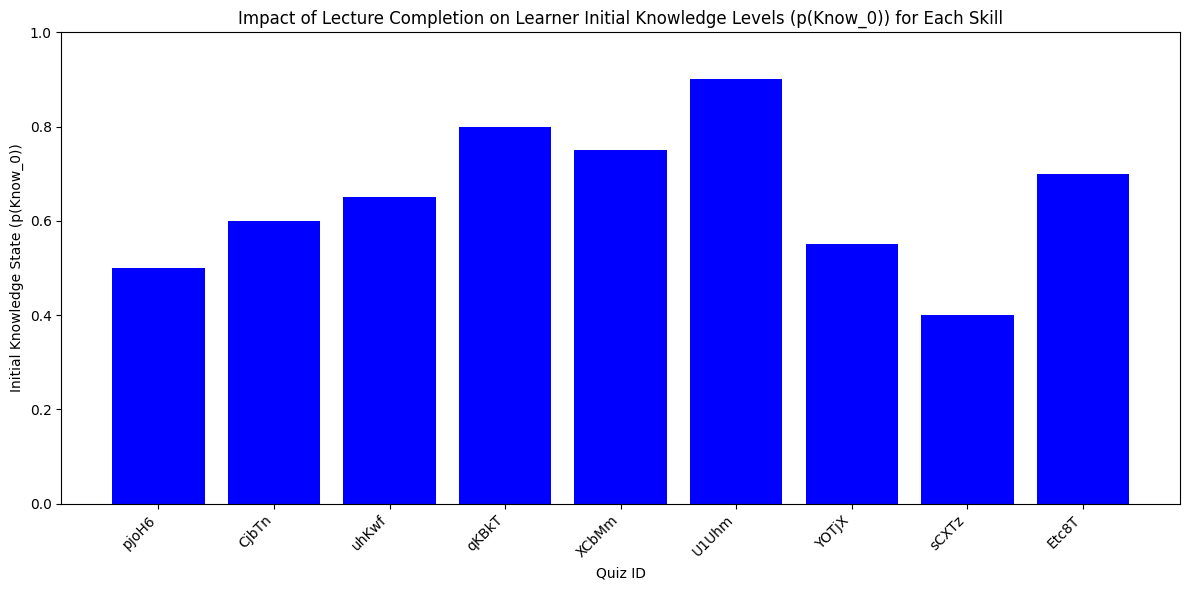

In [78]:
import matplotlib.pyplot as plt
import pandas as pd


# Step 1: Filter Data for Students Who Completed the Lecture
completed_lecture_data = data[data['Lecture Completed'] == 'Yes']

# Step 2: Define Quiz IDs and Skill Names
quiz_skill_mapping = {
    'CjbTn': 'The Role of Social Work',
    'Etc8T': 'The Cost of Child Care',
    'pjoH6': 'Key Concept Quiz',
    'qKBkT': 'Identify Examples of Health Disparities',
    'sCXTz': 'Into America: Dirty Air & COVID-19 Vulnerability',
    'U1Uhm': 'Aging Onto The Street',
    'uhKwf': 'Unpacking Intersectionality',
    'XCbMm': 'The Moral Determinants of Health',
    'YOTjX': 'Case Study on Recent Protests Sparked by the Killing of George Floyd'
}

# Step 3: Extract Initial Knowledge States for Completed Lectures
# Get unique quiz IDs from the completed lecture data
skills = completed_lecture_data['Quiz ID'].unique()  # Get unique skill names

# Sort the index of the DataFrame
params = params.sort_index()

# Extract initial knowledge states correctly for each skill
initial_knowledge_states = [params.loc[(skill, 'prior')].values[0] for skill in skills if (skill, 'prior') in params.index]
# Convert the NumPy array to a single numeric value
initial_knowledge_states = [val.item() for val in initial_knowledge_states]

# Step 5: Create a list of skill names corresponding to the quiz IDs
quiz_ids = skills
skill_names = [quiz_skill_mapping.get(skill, skill) for skill in skills]

# Step 6: Plotting (Separate Figure)
fig1, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(quiz_ids, initial_knowledge_states, color='blue')
ax1.set_xticks(quiz_ids)
ax1.set_xticklabels(quiz_ids, rotation=45, ha='right')
ax1.set_xlabel('Quiz ID')
ax1.set_ylabel('Initial Knowledge State (p(Know_0))')
ax1.set_title('Impact of Lecture Completion on Learner Initial Knowledge Levels (p(Know_0)) for Each Skill')
ax1.set_ylim(0, 1)
plt.tight_layout()
plt.show()  # Show the plot

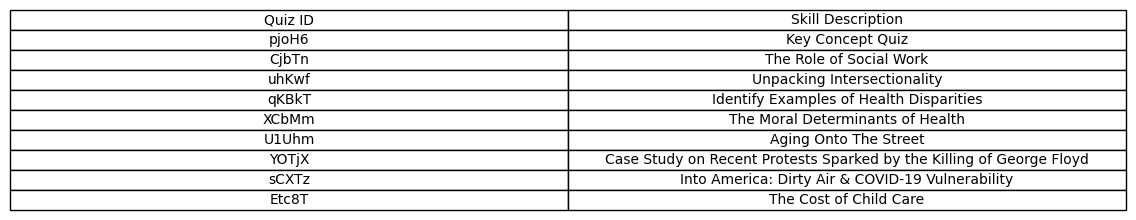

In [82]:
# Step 7: Create table
fig2, ax2 = plt.subplots(figsize=(12, 2))
ax2.axis('off')

table_data = {'Quiz ID': quiz_ids, 'Skill Description': skill_names}
table_df = pd.DataFrame(table_data)

table = ax2.table(cellText=table_df.values,
                  colLabels=table_df.columns,
                  cellLoc='center',
                  loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.show()  # Show the table

**Research Question 2: How do different time intervals between lecture completion and quiz attempts impact the learning rate (p(Learn))?**

In [53]:
# Group by time intervals and calculate learning rates
time_bins = [0, 30, 60, 120, 180, 240]  # Define time intervals in minutes
data['Time Interval'] = pd.cut(data['Time Gap(mins)'], bins=time_bins)

learning_rates = data.groupby('Time Interval', observed=False)['Quiz Correct (1)/Incorrect (0)'].mean()
print(learning_rates)

Time Interval
(0, 30]      0.97586
(30, 60]     0.99764
(60, 120]    1.00000
(120, 180]   1.00000
(180, 240]   1.00000
Name: Quiz Correct (1)/Incorrect (0), dtype: float64


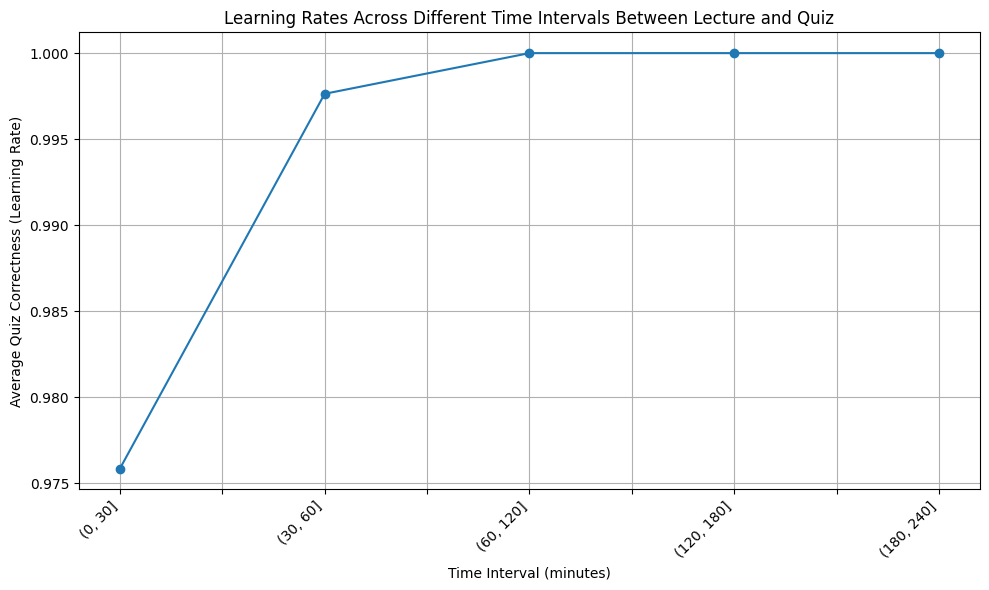

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the line graph
plt.figure(figsize=(10, 6))

# Plot learning rates for completed lectures only
learning_rates.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Time Interval (minutes)')
plt.ylabel('Average Quiz Correctness (Learning Rate)')
plt.title('Learning Rates Across Different Time Intervals Between Lecture and Quiz')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

**Research Question 3: Can the inclusion of lecture-quiz sequences improve the predictive accuracy of BKT models compared to quiz-only models?**

In [55]:
import pandas as pd
from pyBKT.models import Model
from sklearn.metrics import log_loss, roc_auc_score
from tqdm import tqdm

# 1. Load data & standardize column names
df = (
    pd.read_csv("final dataset.csv")
      .rename(columns={
          "Student ID"                        : "user_id",
          "Quiz ID"                           : "skill_name",
          "Quiz Correct (1)/Incorrect (0)"    : "correct",
          "Time Gap(mins)"                    : "time_gap"
      })
)
df["correct"] = df["correct"].astype(int)


In [56]:
# 2. Quiz-Only model
quiz_df   = df[["user_id", "skill_name", "correct"]]
quiz_model = Model(seed=42, num_fits=1)
quiz_model.fit(data=quiz_df)

preds_q = quiz_model.predict(data=quiz_df)
loss_q  = log_loss(quiz_df["correct"], preds_q["correct_predictions"])
auc_q   = roc_auc_score(quiz_df["correct"], preds_q["correct_predictions"])
print(f"Quiz-Only   LogLoss = {loss_q:.4f} | AUC = {auc_q:.4f}")

Quiz-Only   LogLoss = 0.0272 | AUC = 0.9370


In [58]:
# 3. Lecture+Quiz
lecture_model = None
if {"Lecture Completed", "Lecture Time"}.issubset(df.columns):
    pseudo = [
        {"user_id": r.user_id, "skill_name": r.skill_name, "correct": 1}
        for _, r in df.iterrows()
        if str(r["Lecture Completed"]).lower() == "yes"
    ]
    aug = pd.concat([df, pd.DataFrame(pseudo)], ignore_index=True)
    lecture_df = aug[["user_id", "skill_name", "correct"]]

    lecture_model = Model(seed=42, num_fits=1)
    lecture_model.fit(data=lecture_df)

    preds_l = lecture_model.predict(data=lecture_df)   # ← DataFrame  data=
    loss_l  = log_loss(lecture_df["correct"], preds_l["correct_predictions"])
    auc_l   = roc_auc_score(lecture_df["correct"], preds_l["correct_predictions"])
    print(f"Lecture+Quiz LogLoss = {loss_l:.4f} | AUC = {auc_l:.4f}")

Lecture+Quiz LogLoss = 0.0156 | AUC = 0.9640


In [59]:
# Data Preparation
import matplotlib.pyplot as plt

# Collecting results
results = {
    "Model": ["Quiz-Only", "Lecture+Quiz"],
    "LogLoss": [loss_q, loss_l],
    "AUC": [auc_q, auc_l]
}

# Create a DataFrame for better manipulation
results_df = pd.DataFrame(results)

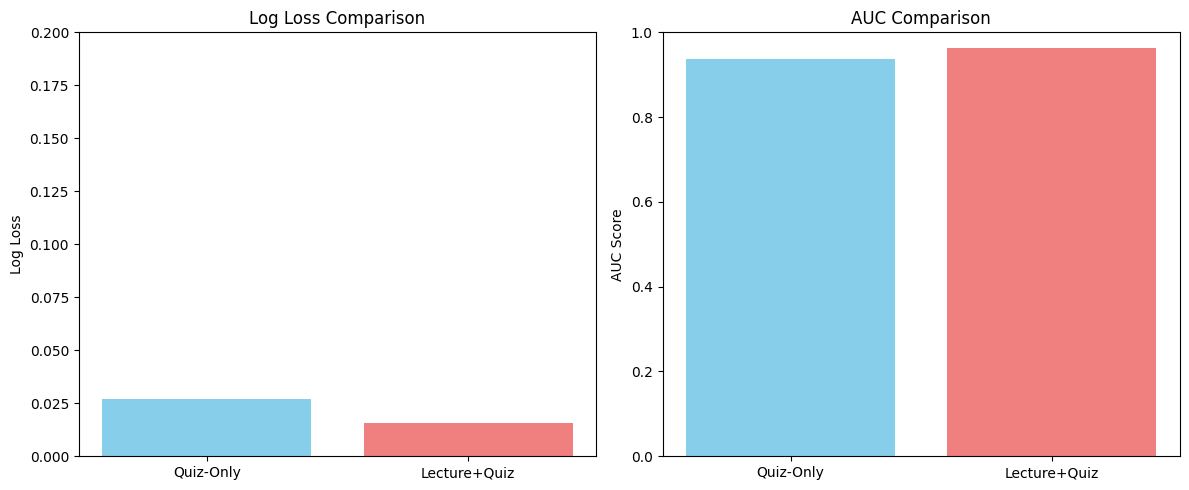

In [63]:
# Visualizing
# Plotting bar chart for Log Loss and AUC
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plotting Log Loss
ax[0].bar(results_df["Model"], results_df["LogLoss"], color=['skyblue', 'lightcoral'])
ax[0].set_title('Log Loss Comparison')
ax[0].set_ylabel('Log Loss')
ax[0].set_ylim(0, 0.2)

# Plotting AUC
ax[1].bar(results_df["Model"], results_df["AUC"], color=['skyblue', 'lightcoral'])
ax[1].set_title('AUC Comparison')
ax[1].set_ylabel('AUC Score')
ax[1].set_ylim(0, 1)

# Show the plot
plt.tight_layout()
plt.show()